# Top Cuisines Analysis

# Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [10]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Dataset .csv")   
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [28]:
df.shape

(9542, 21)

# Data Cleaning

In [29]:
df.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [18]:
df = df.dropna(subset=['Cuisines'])

In [19]:
"North Indian, Chinese"
"Italian, Pizza, Fast Food"

'Italian, Pizza, Fast Food'

In [20]:
cuisines_series = df['Cuisines'].str.split(', ')

In [21]:
all_cuisines = cuisines_series.explode()

In [22]:
cuisine_counts = all_cuisines.value_counts()
cuisine_counts.head(10)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64

In [23]:
top3 = cuisine_counts.head(3)
print(top3)

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [24]:
total_restaurants = df.shape[0]

In [25]:
top3_percentage = (top3 / total_restaurants) * 100
print(top3_percentage)

Cuisines
North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: count, dtype: float64


In [26]:
result = pd.DataFrame({
    'Cuisine': top3.index,
    'Restaurant Count': top3.values,
    'Percentage (%)': top3_percentage.values
})

print(result)

        Cuisine  Restaurant Count  Percentage (%)
0  North Indian              3960       41.500734
1       Chinese              2735       28.662754
2     Fast Food              1986       20.813247


# Visualization

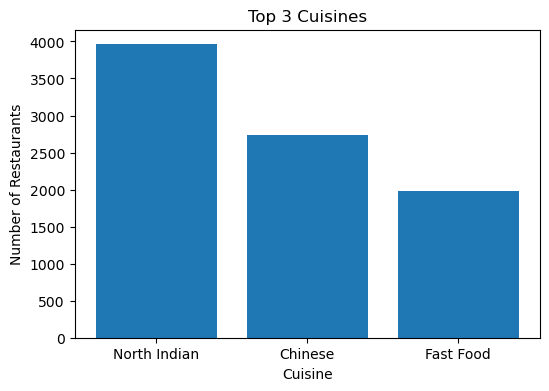

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(top3.index, top3.values)
plt.title("Top 3 Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.show()